# EDA: Netflix Titles Plot Popularity Detailed Analysis
study made by: Jorge García Navarro

## 0. Introduction
As part of the bootcamp’s schedule at The Bridge Digital Talent, this EDA project was
planned in order to put into practice all the knowledge acquired up until that stage.
The chosen topic was to analyze Netflix Titles Plots aiming to find the most popular words
from each genre, creating a path to a future Machine Learning project.

### Hypothesis
Without any previous knowledge about this certain topic, a vague hypothesis was made in
order to establish an objective:
The genre Drama has the highest mean rating and its most popular words are: murder and
vengeance.
It was later proven that this hypothesis was completely offset.


## 1. Data Mining

All data mining functionality is contained in the mining_data_tb.py file.
Classes: OmdbCleaner, NetCleaner, WordCleaner.

### Data Sources
The data was extracted from three separate sites:
- Netflix user ratings Dataset: https://www.kaggle.com/netflix-inc/netflix-prize-data
- IMDb official site Dataset: (title.basics.tsv.gz) https://www.imdb.com/interfaces/
- OMDb API: http://www.omdbapi.com/

#### Netflix user ratings Dataset
The data was divided into four ‘combined.txt’ files, each with a csv style format with a ‘\t’
separator. Also it was separated by sections according to its own ‘netflix_id’. Many
transformations were made in order to convert each of them into a proper csv file and
combine them into one single Dataframe.
Furthermore, it was grouped by its ‘netflix_id’ calculated by one side the total votes and its
mean rating. It was later joined with the ‘netflix_movies_titles.csv’ file in order to add the
movie titles associated with their ‘netflix_id’.
The result of this was a Dataframe with the following columns: netflix_id, title,
number_of_votes and netflix_rating.
#### IMDb official site Dataset
A simple dataset containing both movie title name and its associated imdb ID. Combined
with the Netflix dataset it was possible to acquire the imdb ID of most of the Netflix titles.
Many titles were lost due to missmatching titles in both datasets.
#### OMDb API
The source of the main data for analysis, this API contains all the title plots from IMDb.
An API key was obtained, but the only way to obtain the plot data was by making a title by
title API request. There was a limit of a thousand free requests per day, so this process was
the longest and most limiting.
In the end it was possible to obtain every Netflix title plot with an imdb ID, resulting in a
~8000 row Base Dataframe.
Had there been more time to develop this project, other routes would have been taken in
order to acquire more data.

In [21]:
import os, sys
import pandas as pd
from utils.mining_data_tb import OmdbCleaner, NetCleaner, WordCleaner

rootpath = os.path.dirname(os.getcwd())

# PATHS
data_path = rootpath + os.sep + 'data' # --> data
net_raw_path = data_path + os.sep + 'Netflix_raw' # --> data/Netflix_raw | Netflix Raw Data
net_movies_path = net_raw_path + os.sep + 'netflix_movie_titles.csv' # --> data/Netflix_raw/netflix_movie_titles.csv
imdb_path = data_path + os.sep + 'titles.tsv' # --> data/titles.tsv | IMDb Official Dataset
omdb_net_path = data_path + os.sep + 'OMDb_Netflix' # --> data/OMDb_Netflix | OMDb API
netid_path = net_raw_path + os.sep + 'Net_Data_ID.csv' # --> Generated file.

### Cleaning the data
Once the BASE Dataframe was obtained, the development of new programs in order to
clean the data started.

It was noted that the majority of titles had more than one Genre associated with them. In
order to enable a genre by genre plot analysis, a method was made to ‘expand’ the Base
Dataframe, unfolding every title by all its genres. This resulted in the duplication of many
titles with the difference that each one of them had only one Genre associated.

Once the EXPANSE Dataframe was obtained, new methods were developed in order to
extract all the words in every plot for each genre and generate a Dataframe with statistics of
every word. Due to the large amount of words and many of them giving redundant or
unuseful information, only nouns were extracted by the help of the nltk python library.
A Dataframe was returned and saved for every genre, containing nouns with a threshold of
percentage occurrence of 5%. As part of the statistics, besides the percentage occurrence a
mean rating was calculated (mean rating of every title containing a certain word in a select
genre), a number of titles where the word appeared and a total count of word occurrence.
The joining of every Dataframe resulted in the WORD_STATS Dataframe, containing every
noun word for every genre over the stated threshold.

An option was included to exclude from each Dataframe during visualization the most
common words from all genres. A new percentage occurrence was calculated where words
with a 30% threshold from each top 5 words were extracted. These words were: “new”,
“young” and “life”. It was left as an option in order not to subjectivize the data study.

Cleaning the data was by far the most challenging, constantly optimizing the processing
methods in order to reduce the computing time.

In [ ]:
from utils.folders_tb import Folders

# API KEY
tokenpath = os.getcwd() + os.sep + 'utils' + os.sep + 'api_token.json'
tokens = Folders.read_json(tokenpath)
key = tokens['key']

#OMDB
omdb = OmdbCleaner(net_path=net_movies_path, imdb_path=imdb_path, omdb_net_path=omdb_net_path)
omdb.get_imdb_ids(save=True)
#omdb.omdb_to_csv(key, netid_path, savepath=omdb_net_path, row_start=10, row_num=10) # API Request example
omdb.join_omdb(omdb_net_path, save=True)

#NETFLIX
netflix = NetCleaner()
netflix.get_title_ratings(net_raw_path, data_path, save=True)
netflix.get_base_dataframe(data_path, omdb_net_path, save=True)

#WORD STATS
base = pd.read_csv(data_path + os.sep + 'BASE.csv') # --> Base Dataframe
wcleaner = WordCleaner(base)
wcleaner.expand_df(savepath=data_path, save=True)
#wcleaner.get_popdf('Mystery', log=True) # Example method for obtaining word stats of a certain genre.
wordstat_path = data_path + os.sep + 'word_stats'

# **ATENTION**
wcleaner.genres_to_popcsv(wordstat_path) #If there are no previous word_stats files the estimates processing time is ~5 HOURS.

## 2. Visualization

In [2]:
from utils.visualization_tb import Visualizer

#REPORTS PATH
reports = rootpath + os.sep + 'reports'

#DATASETS
base = pd.read_csv(data_path + os.sep + 'BASE.csv')
expanse = pd.read_csv(data_path + os.sep + 'EXPANSE.csv')
word_stats = pd.read_csv(data_path + os.sep + 'WORD_STATS.csv')

#VISUALIZER
viz = Visualizer(base, expanse, word_stats)

### 2.1 Project Steps Chart

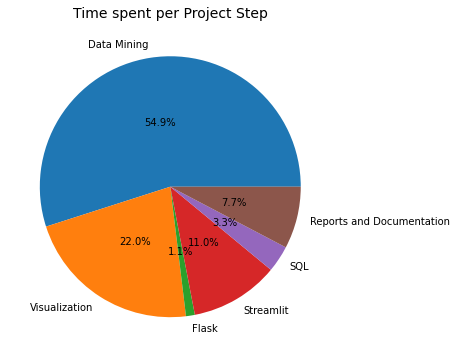

In [3]:
viz.timepie(save=reports)

### 2.2 Graphs

A Title distribution pie chart was made, which contributed to the understanding of each
genre’s analysis fidelity.

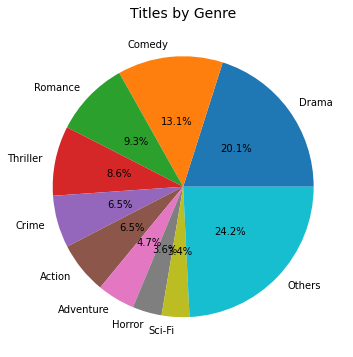

In [4]:
viz.plot_genre_pie(save=reports)

A density plot for each rating(Netflix, IMDb, Metascore) and a line plot for each rating based
on the title’s decade. Options were included to select all data or a certain genre.

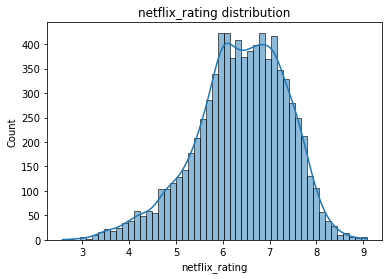

In [4]:
viz.plot_displot(save=reports)

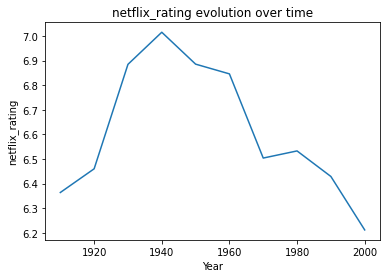

In [6]:
viz.plot_year_lineplot(save=reports)

For a basic understanding of each genre’s word popularity, a word cloud was made with the
use of the wordcloud python library.

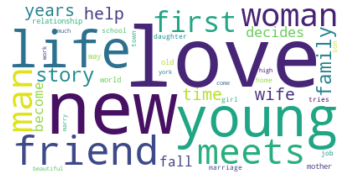

In [7]:
viz.generate_wordcloud('Romance', save=reports) #Romance WordCloud example.

For further information, an interactive Treemap containing all genres was made.

In [3]:
viz.plot_treemap(save=reports)

Additionally, a basic bar chart was made for each genre for a more specific observation.

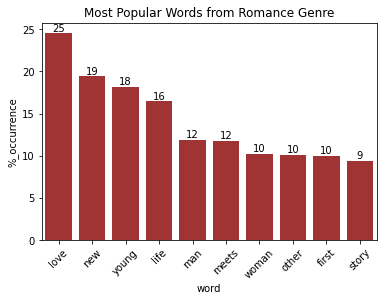

In [4]:
viz.plot_word_barchart('Romance', x='word', y='%_occurrence', sort=1, show_values=True, save=reports)

## 3. Flask & Streamlit

* Flask server: run /api/server.py -x 8642 on terminal.
* Streamlit: run /dashboard/app.y on terminal

### Flask
A simple Flask API was developed, containing an endpoint which returned a json of the
BASE Dataframe. It required a specific token_id as a ‘get’ parameter and argparse was
included for command line execution.
All its functionality is contained in the server.py and apis_tb.py files.

### Streamlit
Streamlit is a python library destined to represent in a simple and dynamic dashboard the
Analyzed Data. A section for each type of visualization was made, including a request to the
previously designed Flask API endpoint to retrieve the json data.
All its functionality is contained in the app.py and dashboard_tb.py file.
Classes: StreamFuncs.

## 4. Option C EDA Questions

### a. Was it possible to demonstrate the hypothesis? Why?
After many data transformations on the Base Dataset, it was possible to find an answer to the stated hypothesis. 
                The analyzed data showed not only that the best rated genre was Film-Noir instead of Drama, 
                but neither 'murder' nor 'vengeance' were in the top 20.
### b. What can you conclude about your data study?
Based on the analyzed data it can be stated that the genre 'Film-Noir' has the highest rating
                and the most common words by %_occurrence are: 'new', 'young', 'life'.
### c. What would you change if you need to do another EDAproject?
The data mining should be more specific. 
                There was not a clear goal at the beginning and valuable time was wasted on this particular task.
                Furthermore, the results would be more reliable if more data was gathered.
### d. What did you learn doing this project?
To specify as much as possible the objective of the project and what is needed to reach that purpose.

## 5. Histograms and Heatmaps

In order to fulfill certain requirements, Histograms and Heatmaps were plotted. The
heatmaps did not provide any useful information for this particular study.

### 5.1 Netflix Rating Histogram

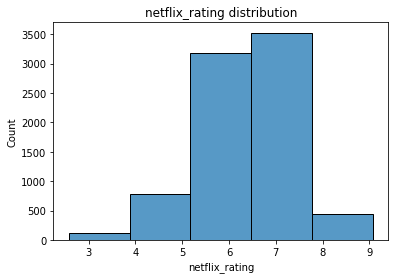

In [5]:
viz.plot_displot(kde=False, bins=5, save=reports)

### 5.2 IMDB Rating Histogram

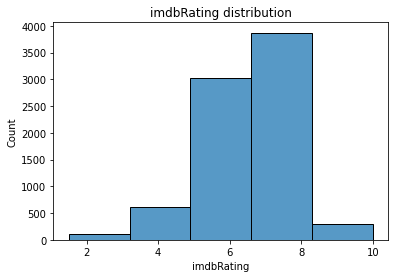

In [6]:
viz.plot_displot(x='imdbRating', kde=False, bins=5, save=reports)

### 5.3 Metascore Rating Histogram

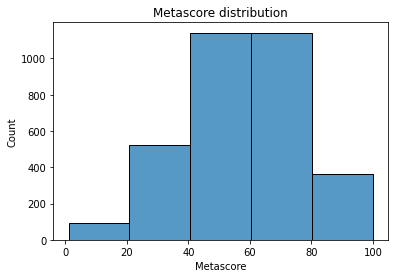

In [7]:
viz.plot_displot(x='Metascore', kde=False, bins=5, save=reports)

### 5.4 BASE Heatmap

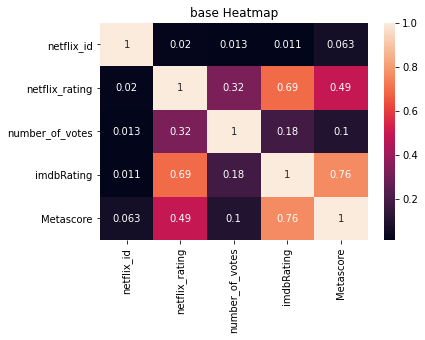

In [8]:
viz.heatmap(save=reports)

### 5.5 EXPANSE Heatmap

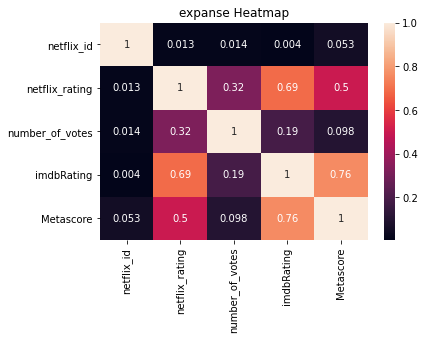

In [9]:
viz.heatmap(data='expanse', save=reports)

### 5.6 WORD STATS Heatmap

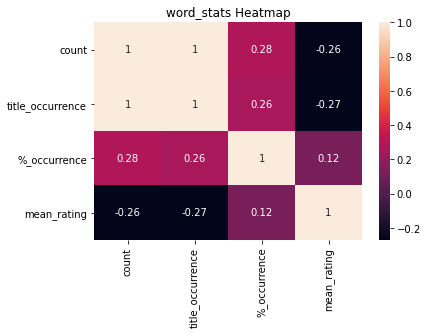

In [10]:
viz.heatmap(data='word_stats', save=reports)

## 6. SQL Server

As another requirement, it was ordered to insert the BASE Dataframe into a MySQL Server.
A method was made in order to automatically create and insert said Dataframe into the given
server.
All its functionality is contained in the sql_tb.py file.
Classes: MySQL.

In [15]:
from utils.sql_tb import MySQL
from utils.folders_tb import read_json

settings_file = rootpath + os.sep + 'src' + os.sep + 'utils' + os.sep + 'settings_sql.json'
json = read_json(fullpath=settings_file)

IP_DNS = json["IP_DNS"]
PORT = json["PORT"]
USER = json["USER"]
PASSWORD = json["PASSWORD"]
BD_NAME = json["BD_NAME"]

driver = MySQL(IP_DNS, USER, PASSWORD, BD_NAME, PORT)

In [16]:
driver.df_to_table('jorge_garcia_navarro', base) #TABLE Already created

7.2", "68.0", "Drama", "The Maclean brothers, Paul and Norman, live a relatively idyllic life in rural Montana, spending much of their time fly fishing. The sons of a minister, the boys eventually part company when Norman moves east to attend college, leaving his rebellious brother to find trouble back home. When Norman finally returns, the siblings resume their fishing outings, and assess both where they've been and where they're going.")

 successfully
(1064, 'You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near \'Going Down" offers a glimpse of his personal hell with a wickedly funny twist.")\' at line 1')
Executed 

INSERT INTO jorge_garcia_navarro (NETFLIX_ID, NETFLIX_RATING, NUMBER_OF_VOTES, TITLE, IMDBID, YEAR, IMDBRATING, METASCORE, GENRE, PLOT) VALUES (17711, "6.338342220067863", 2063, "The Diary of Ellen Rimbauer", "tt0350811", 2003, "5.5", "0", "Drama, Horror, Mystery, Thriller", "Set at the tur

## 7. Option A EDA Questions

### a. Are there outliers or some rare data?
Based on the nature of the study on the collected data, there are no outliers to be considered. 

### b. What are the columns that have more repeated values?
Every row on the used Datasets is unique, so there should not be any repeated values. There is an issue pending for future optimization were some similar titles returned the same IMDb ID when merged (eg. The Godfather parts II and III).